In [3]:
# Common
import os
import numpy as np

# Data 
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

# Model
from keras import Sequential
from keras.layers import Dense, Dropout

# Callbacks 
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Model Performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [5]:
file_path = 'fetal_health.csv.xls'
data = pd.read_csv(file_path)
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

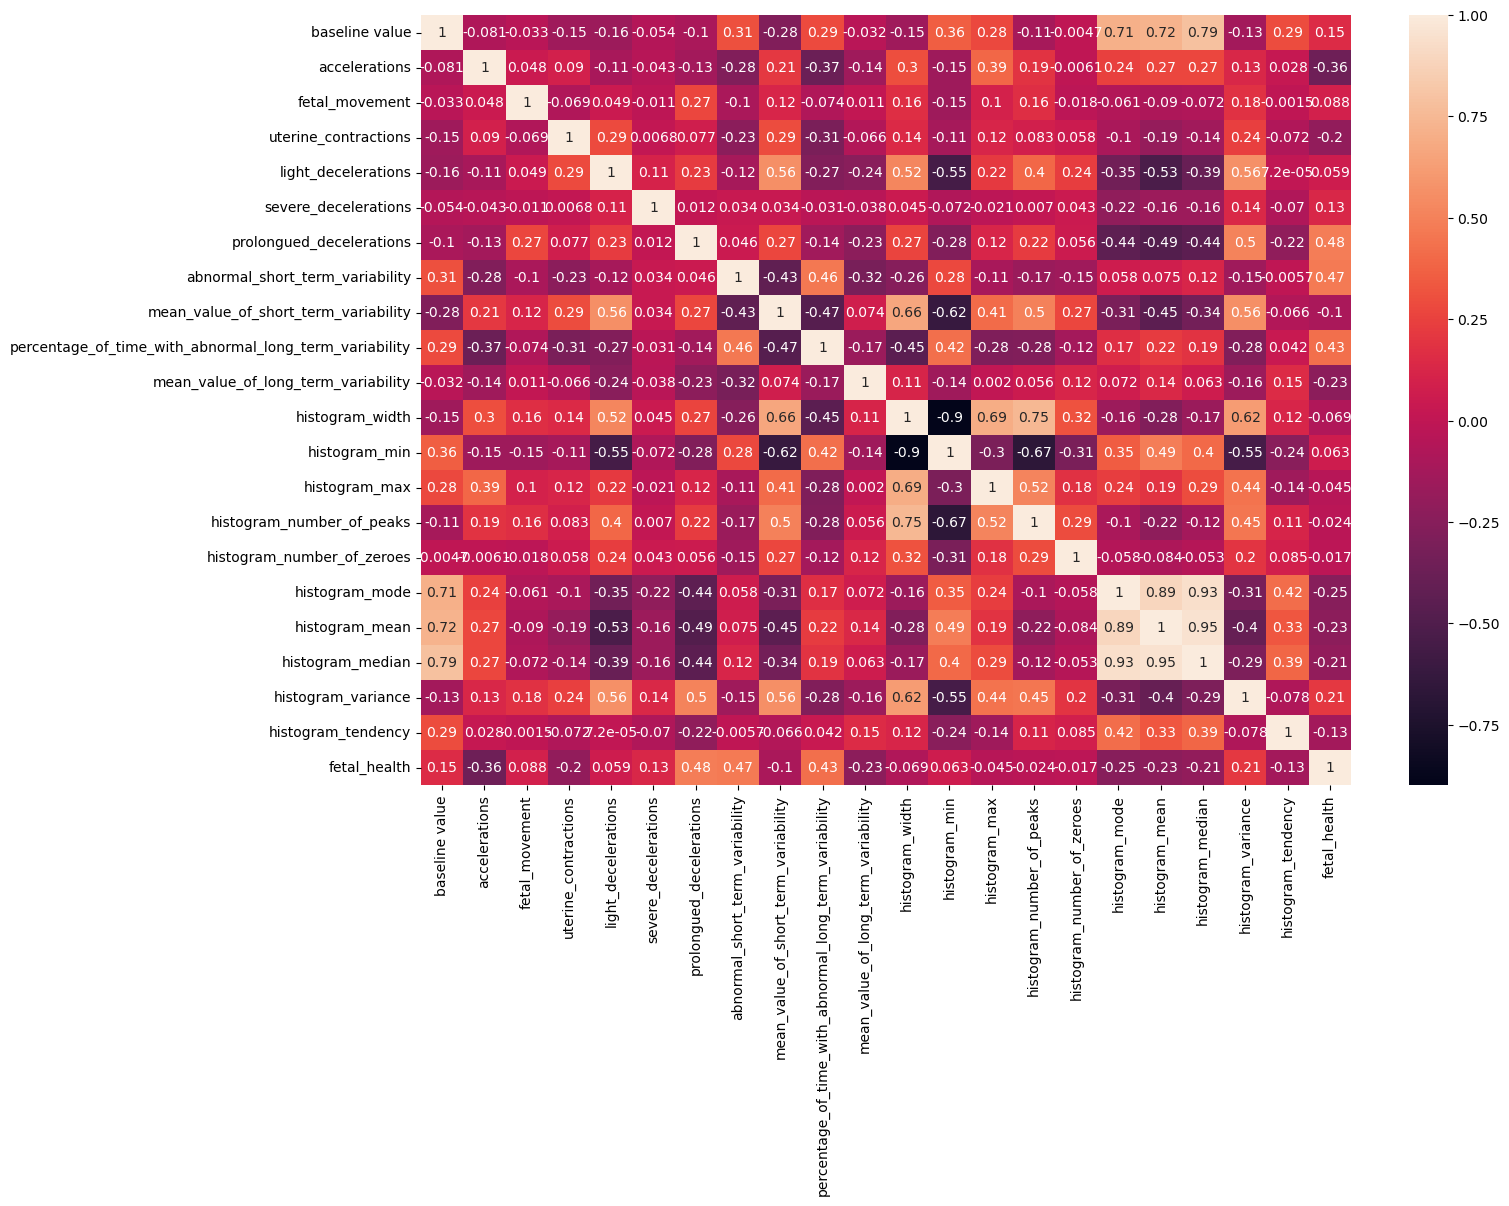

In [7]:
corr = data.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)
plt.show()

In [8]:
def search_strong_relation(value):
    if value >= 0.7:
        return value
    elif value<=-0.7:
        return value 
    else:
        return 0
    

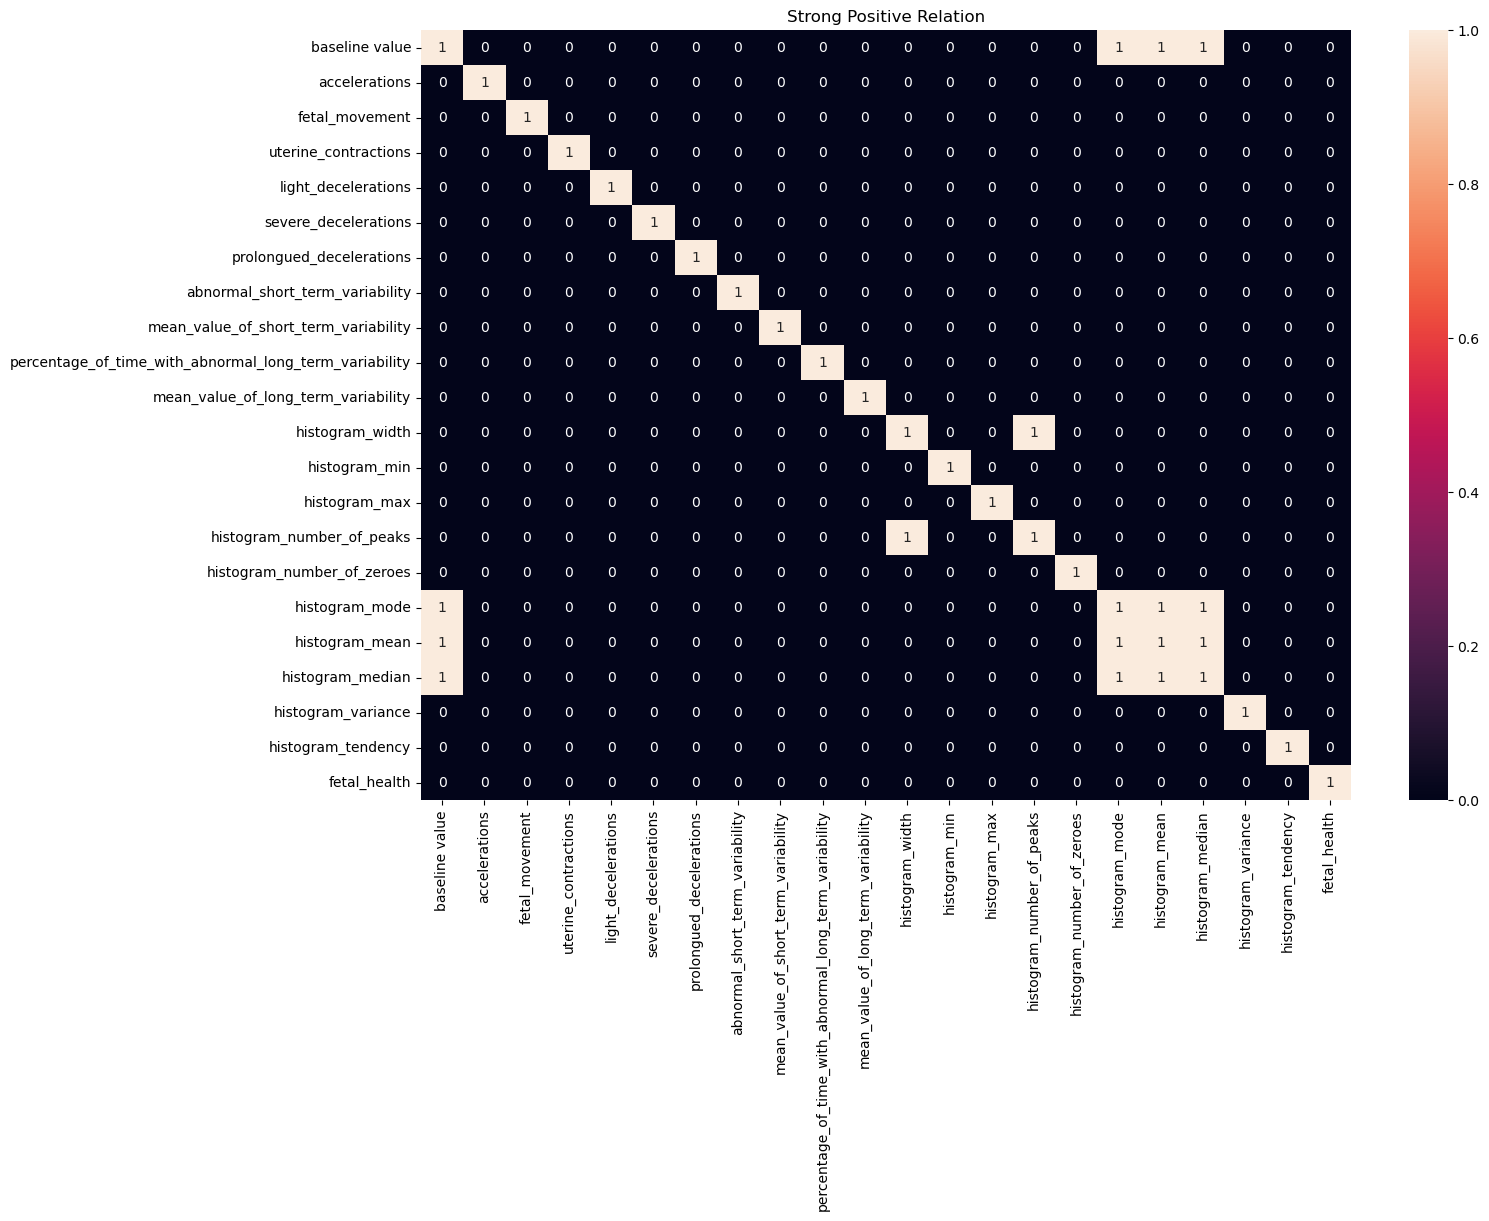

In [9]:
corr = data.corr()
corr = (corr>=0.7).astype('int')

plt.figure(figsize=(15,10))
plt.title("Strong Positive Relation")
sns.heatmap(corr, annot=True)
plt.show()

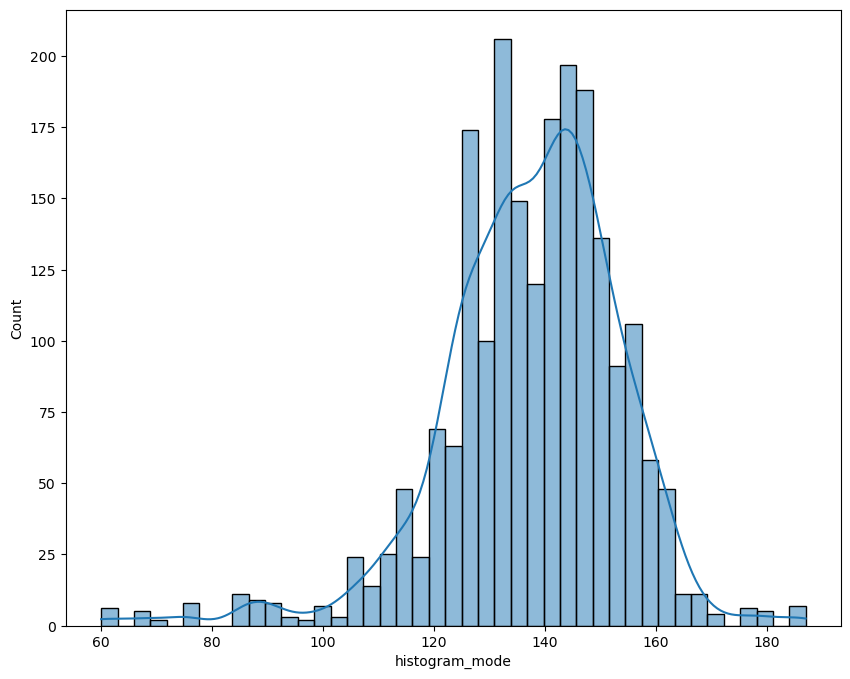

In [10]:
plt.figure(figsize=(10,8))
sns.histplot(data['histogram_mode'], kde=True)
plt.show()

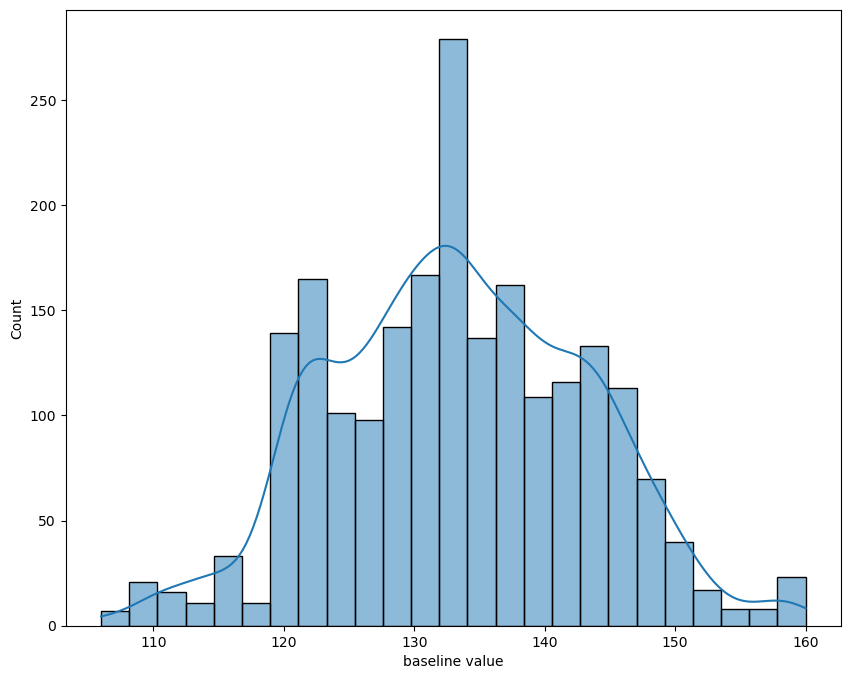

In [11]:
plt.figure(figsize=(10,8))
sns.histplot(data['baseline value'], kde=True)
plt.show()

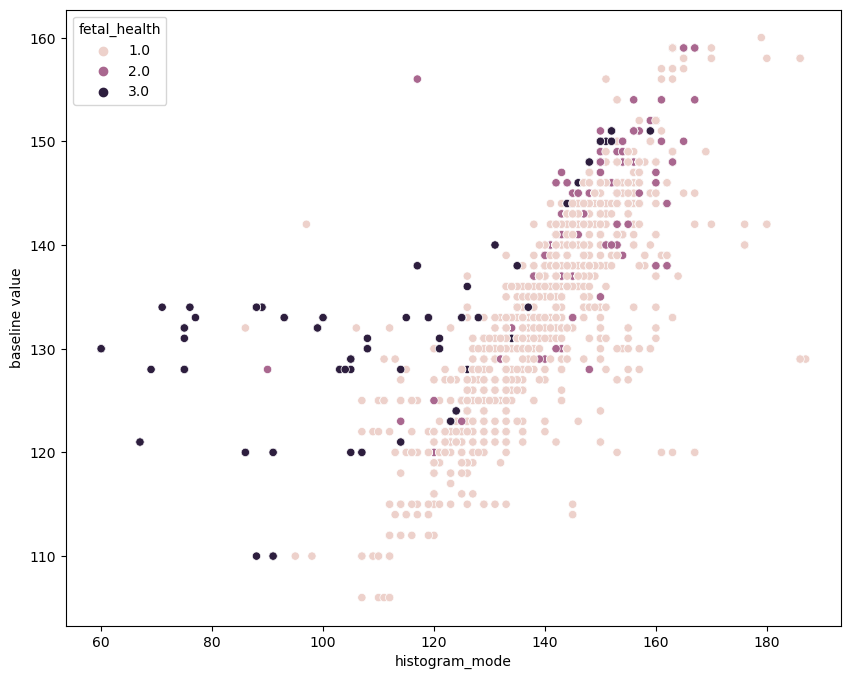

In [12]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    data=data,
    x='histogram_mode',
    y='baseline value',
    hue='fetal_health'
)
plt.show()


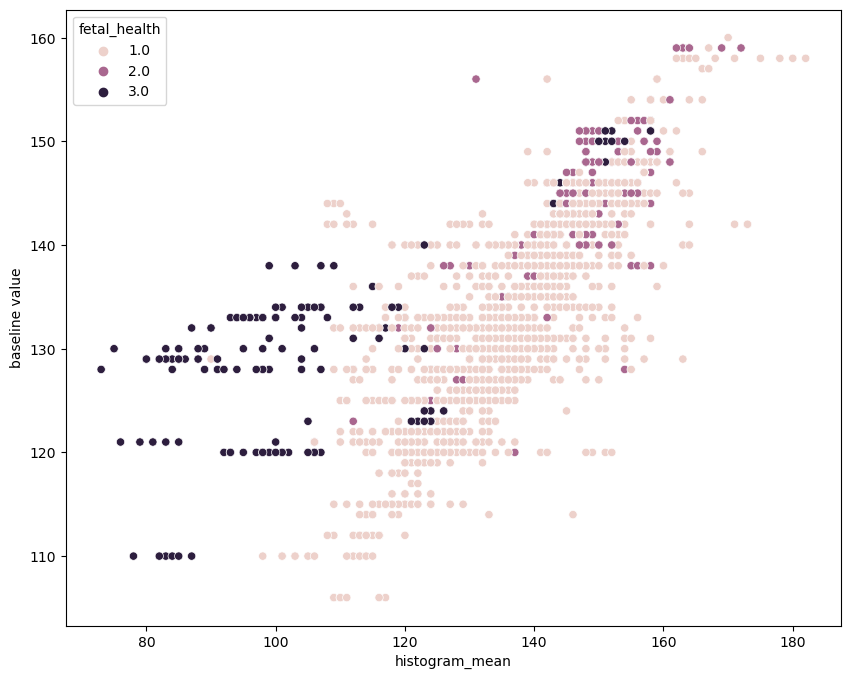

In [13]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    data=data,
    x='histogram_mean',
    y='baseline value',
    hue='fetal_health'
)
plt.show()
